In [1]:
import pandas as pd 
import glob

In [2]:
glob.glob("./monthly sales/*.csv") #this help to put all the .csv file in the dir in to a list

['./monthly sales\\Sales_April_2019.csv',
 './monthly sales\\Sales_August_2019.csv',
 './monthly sales\\Sales_December_2019.csv',
 './monthly sales\\Sales_February_2019.csv',
 './monthly sales\\Sales_January_2019.csv',
 './monthly sales\\Sales_July_2019.csv',
 './monthly sales\\Sales_June_2019.csv',
 './monthly sales\\Sales_March_2019.csv',
 './monthly sales\\Sales_May_2019.csv',
 './monthly sales\\Sales_November_2019.csv',
 './monthly sales\\Sales_October_2019.csv',
 './monthly sales\\Sales_September_2019.csv']

In [3]:
# Now, i am goint to loop through the list of sales, read each of them and append them all to an empty list "sales"
sales=[]

for all_sales in glob.glob("./monthly sales/*.csv"):  #the loop
    print(f"loading {all_sales}")      #checking if the looping is done right 
    new_df = pd.read_csv(all_sales)   # reading each csv files with pandas   
    sales.append(new_df)              # append each csv files after reading them in the "sales" list that was empty befor 

loading ./monthly sales\Sales_April_2019.csv
loading ./monthly sales\Sales_August_2019.csv
loading ./monthly sales\Sales_December_2019.csv
loading ./monthly sales\Sales_February_2019.csv
loading ./monthly sales\Sales_January_2019.csv
loading ./monthly sales\Sales_July_2019.csv
loading ./monthly sales\Sales_June_2019.csv
loading ./monthly sales\Sales_March_2019.csv
loading ./monthly sales\Sales_May_2019.csv
loading ./monthly sales\Sales_November_2019.csv
loading ./monthly sales\Sales_October_2019.csv
loading ./monthly sales\Sales_September_2019.csv


In [4]:
len(sales)
# checking if all the csv files append by checking the lenght of the list

12

In [5]:
All_sales = pd.concat(sales)     # concating all the csv into one dataset 
# All_sales.to_csv("../Sales/All_sales.csv", index=False) #convert the date to a new csv file and save it as "All_sales"
# All_sales.describe()

### - here are question to asnwer 

- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [6]:
df = pd.read_csv("./All_sales.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [96]:

# to answer the first question we have to split the address and seperate d city from the it 
drop = df.dropna( how ="any", axis =0, inplace = True)
state=df["Purchase Address"].str.split(",", expand = True)[2]
city =df["Purchase Address"].str.split(",", expand = True)[1]
state_abbrv = state.str.split(" ",expand = True)[1]
df["City"] = city +", "+ state_abbrv
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001","Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215","Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA"
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001","Los Angeles, CA"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016","San Francisco, CA"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016","San Francisco, CA"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016","San Francisco, CA"


#### What city sold the most product?

In [93]:
# df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
# df["Price Each"] = pd.to_numeric(df["Price Each"])
# df["Order Date"] = pd.to_datetime(df["Order Date"])

table = pd.pivot_table(df, values=["Quantity Ordered","Price Each"], index=["City"],
                    aggfunc=sum)
table

,Price Each,Quantity Ordered
City,,
"Atlanta, GA",2.779908e+06,16602
"Austin, TX",1.809874e+06,11153
"Boston, MA",3.637410e+06,22528
"Dallas, TX",2.752628e+06,16730
"Los Angeles, CA",5.421435e+06,33289
"New York City, NY",4.635371e+06,27932
"Portland, ME",4.471893e+05,2750
"Portland, OR",1.860558e+06,11303
"San Francisco, CA",8.211462e+06,50239


In [16]:
import matplotlib.pyplot as plt

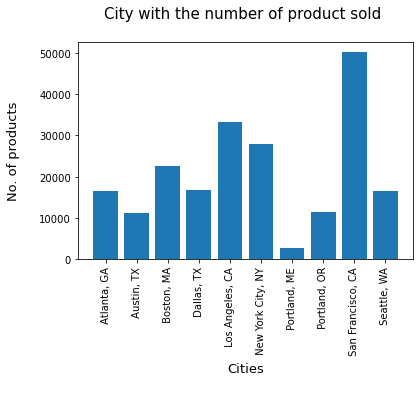

In [28]:
plt.bar(table.index,table["Quantity Ordered"])
plt.title("City with the number of product sold \n",size=15)
plt.xlabel("Cities\n",size=13)
plt.ylabel("No. of products\n",size=13)
plt.xticks(rotation='vertical', size=10)
plt.show()

The most product sales come from San Francisco, CA

#### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

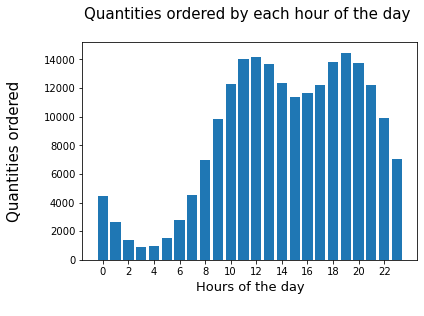

In [92]:
#us pd.datetime to split the Order date column into year,month,day, time and hour
year = df["Order Date"].dt.year
month = df["Order Date"].dt.month
days = df["Order Date"].dt.day
time = df["Order Date"].dt.time
hours = df["Order Date"].dt.hour
#creating a pivot table to show the numbers of orders  by each hour of the day 
table1 = pd.pivot_table(df, values=["Quantity Ordered"], index=hours,
                    aggfunc=sum)
plt.bar(table1.index,table1["Quantity Ordered"])


plt.title("Quantities ordered by each hour of the day \n",size=15)
plt.xlabel("Hours of the day\n",size=13)
plt.ylabel("Quantities ordered\n",size=15)
plt.xticks(table1.index[::2])
plt.show()

Generally the numbers of orders is always high between the hour of 10, this is the time most people set out to go about their daily activities, this means that people pick up products on their way out 

The quantity of orders also drop btw the 12th hour which is the mid-day to the 17th hours which is most the work closing hours and the sales picked up again till the the late 22 hour, this means that people pick up product on their way back home after their daily activities.

Therefor; the best time to display advertisemens to maximize the likelihood of customer’s buying product should be in the night btw the 6-9, 13- 16 and 22 to 0 hour to either create the awearness in coustomers mind or remind those who have in mind to get but forget 


#### What products are most often sold together? 

In [146]:
df2=df.loc[df["Order ID"].duplicated(keep = False),:]
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215","Boston, MA"
...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301","Atlanta, GA"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301","Atlanta, GA"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301","Atlanta, GA"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016","San Francisco, CA"


In [144]:
df2.mode()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,160873,USB-C Charging Cable,1,11.95,2019-12-15 20:16:00,"197 Center St, San Francisco, CA 94016","San Francisco, CA"
